In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [12]:
df = pd.read_csv("/Users/mahinbindra/Downloads/Group Project Data-SFD Data-Toronto Police copy.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [13]:
df.drop(columns=["X", "Y", "OCC_DATE", "OCC_DOY"], inplace=True)

In [14]:
df

,OBJECTID,EVENT_UNIQUE_ID,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,1,GO-2004397105,2004,May,Saturday,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,2,GO-2004600109,2004,July,Monday,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,3,GO-2004311851,2004,May,Friday,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,4,GO-2004736004,2004,December,Sunday,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,5,GO-2004303455,2004,April,Monday,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,5703,GO-20221038418,2022,June,Thursday,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5703,5704,GO-20221362949,2022,July,Sunday,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5704,5705,GO-2022336423,2022,February,Monday,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5705,5706,GO-20221765442,2022,September,Sunday,11,1,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


In [15]:
df.set_index('OBJECTID', inplace=True)

In [16]:
df

,EVENT_UNIQUE_ID,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
OBJECTID,,,,,,,,,,,,,,,,
1,GO-2004397105,2004,May,Saturday,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
2,GO-2004600109,2004,July,Monday,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
3,GO-2004311851,2004,May,Friday,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
4,GO-2004736004,2004,December,Sunday,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
5,GO-2004303455,2004,April,Monday,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,GO-20221038418,2022,June,Thursday,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5704,GO-20221362949,2022,July,Sunday,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5705,GO-2022336423,2022,February,Monday,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621


In [17]:
df2 = df[df!='NSA']
df2.dropna(inplace=True)
df2.isna().any().any()

False

In [18]:
df2.head(20)

,EVENT_UNIQUE_ID,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
OBJECTID,,,,,,,,,,,,,,,,
1,GO-2004397105,2004,May,Saturday,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
2,GO-2004600109,2004,July,Monday,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
3,GO-2004311851,2004,May,Friday,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
4,GO-2004736004,2004,December,Sunday,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
5,GO-2004303455,2004,April,Monday,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
6,GO-2004213938,2004,March,Sunday,14,0,Night,D33,0,0,150,Fenside-Parkwoods,45,Parkwoods-Donalda (45),-79.318704,43.759919
7,GO-2004149554,2004,January,Monday,19,23,Evening,D42,0,0,144,Morningside Heights,131,Rouge (131),-79.197132,43.796763
8,GO-2004646393,2004,September,Wednesday,8,14,Afternoon,D23,0,0,2,Mount Olive-Silverstone-Jamestown,2,Mount Olive-Silverstone-Jamestown (2),-79.588530,43.738688
9,GO-2004764704,2004,April,Wednesday,14,23,Evening,D14,0,0,85,South Parkdale,85,South Parkdale (85),-79.427371,43.638954


In [31]:
neighbour_group = df2.groupby(["NEIGHBOURHOOD_158"])[["EVENT_UNIQUE_ID"]].count().sort_values(by = ["EVENT_UNIQUE_ID"], ascending=False).reset_index()
neighbour_group.rename(columns={'EVENT_UNIQUE_ID': 'TOTAL CRIMES'}, inplace=True)
neighbour_group

,NEIGHBOURHOOD_158,TOTAL CRIMES
0,Glenfield-Jane Heights,311
1,Black Creek,203
2,Mount Olive-Silverstone-Jamestown,192
3,West Humber-Clairville,132
4,York University Heights,117
...,...,...
153,Forest Hill North,3
154,Kingsway South,2
155,Lawrence Park South,1
156,Lawrence Park North,1


In [32]:
df3 = pd.DataFrame(neighbour_group)

In [33]:
df3

,NEIGHBOURHOOD_158,TOTAL CRIMES
0,Glenfield-Jane Heights,311
1,Black Creek,203
2,Mount Olive-Silverstone-Jamestown,192
3,West Humber-Clairville,132
4,York University Heights,117
...,...,...
153,Forest Hill North,3
154,Kingsway South,2
155,Lawrence Park South,1
156,Lawrence Park North,1


In [54]:
df3['High_crime'] = (df3['TOTAL CRIMES'] > 46).astype(int)
df3['Low_crime'] = (df3['TOTAL CRIMES'] < 9).astype(int)
df3

,NEIGHBOURHOOD_158,TOTAL CRIMES,High_crime,Low_crime,total_crime_cat
0,Glenfield-Jane Heights,311,1,0,3
1,Black Creek,203,1,0,3
2,Mount Olive-Silverstone-Jamestown,192,1,0,3
3,West Humber-Clairville,132,1,0,3
4,York University Heights,117,1,0,3
...,...,...,...,...,...
153,Forest Hill North,3,0,1,0
154,Kingsway South,2,0,1,0
155,Lawrence Park South,1,0,1,0
156,Lawrence Park North,1,0,1,0


In [56]:
df3.describe(include='all')

,NEIGHBOURHOOD_158,TOTAL CRIMES,High_crime,Low_crime,total_crime_cat
count,158,158.000000,158.000000,158.000000,158.000000
unique,158,NaN,NaN,NaN,NaN
top,Glenfield-Jane Heights,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,35.702532,0.246835,0.234177,1.481013
std,NaN,41.950609,0.432541,0.424830,1.138339
min,NaN,1.000000,0.000000,0.000000,0.000000
25%,NaN,9.000000,0.000000,0.000000,0.000000
50%,NaN,21.000000,0.000000,0.000000,1.000000
75%,NaN,45.500000,0.000000,0.000000,2.750000


In [57]:
df3['TOTAL CRIMES'].unique()

array([311, 203, 192, 132, 117, 113, 112, 111, 109, 104, 103, 102,  98,
        92,  90,  89,  86,  85,  80,  79,  78,  76,  68,  66,  62,  57,
        56,  55,  53,  51,  48,  47,  46,  44,  43,  42,  41,  40,  39,
        37,  36,  35,  34,  33,  32,  31,  29,  28,  27,  26,  25,  24,
        23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,
         9,   8,   7,   6,   5,   4,   3,   2,   1])

In [58]:
def total_crimes_cat(x):
    if x >= 0 and x <= 9:
        return 0
    elif x > 9 and x <= 21:
        return 1
    elif x >= 21 and x <= 45:
        return 2
    elif x >= 46:
        return 3

In [59]:
df3['total_crime_cat'] = df3['TOTAL CRIMES'].apply(total_crimes_cat)

In [60]:
df3.head(50)

,NEIGHBOURHOOD_158,TOTAL CRIMES,High_crime,Low_crime,total_crime_cat
0,Glenfield-Jane Heights,311,1,0,3
1,Black Creek,203,1,0,3
2,Mount Olive-Silverstone-Jamestown,192,1,0,3
3,West Humber-Clairville,132,1,0,3
4,York University Heights,117,1,0,3
5,Yorkdale-Glen Park,113,1,0,3
6,Malvern East,112,1,0,3
7,Englemount-Lawrence,111,1,0,3
8,Regent Park,109,1,0,3
9,Humber Summit,104,1,0,3


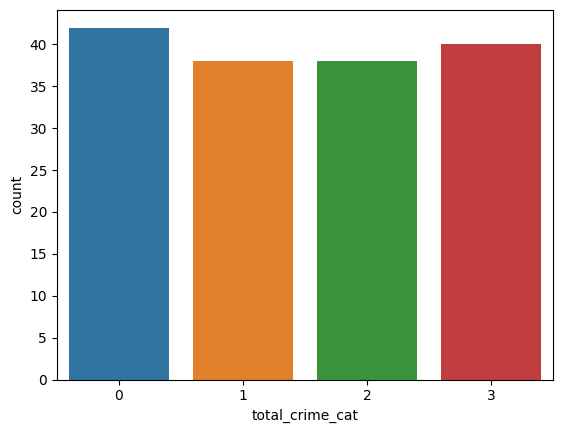

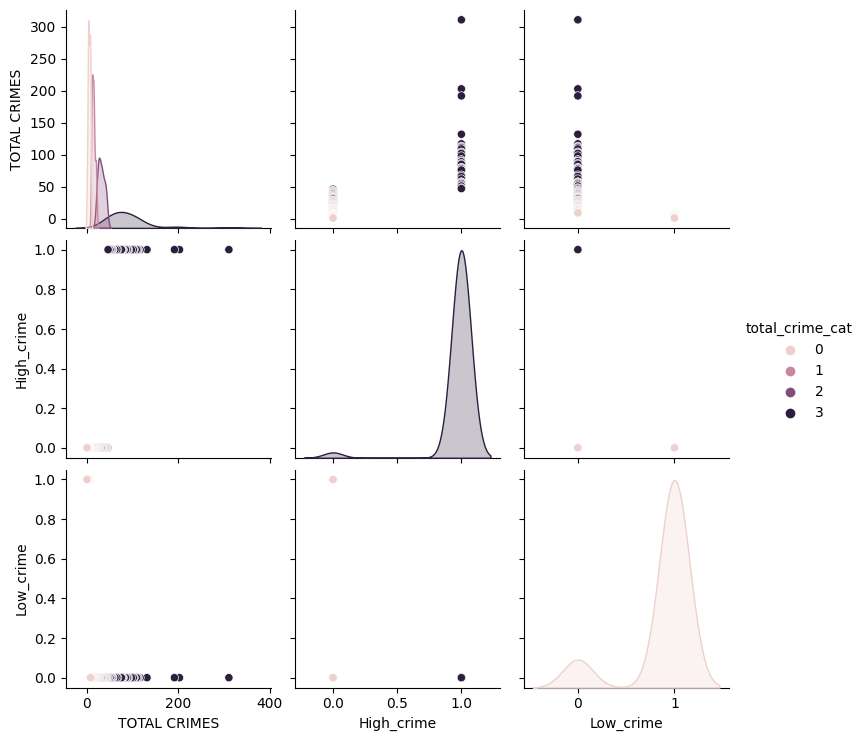

In [62]:
sns.countplot(x='total_crime_cat', data=df3)
plt.show()

# More detailed exploration
sns.pairplot(df3, hue='total_crime_cat')
plt.show()

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5641 entries, 1 to 5707
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVENT_UNIQUE_ID    5641 non-null   object 
 1   OCC_YEAR           5641 non-null   int64  
 2   OCC_MONTH          5641 non-null   object 
 3   OCC_DOW            5641 non-null   object 
 4   OCC_DAY            5641 non-null   int64  
 5   OCC_HOUR           5641 non-null   int64  
 6   OCC_TIME_RANGE     5641 non-null   object 
 7   DIVISION           5641 non-null   object 
 8   DEATH              5641 non-null   int64  
 9   INJURIES           5641 non-null   int64  
 10  HOOD_158           5641 non-null   object 
 11  NEIGHBOURHOOD_158  5641 non-null   object 
 12  HOOD_140           5641 non-null   object 
 13  NEIGHBOURHOOD_140  5641 non-null   object 
 14  LONG_WGS84         5641 non-null   float64
 15  LAT_WGS84          5641 non-null   float64
dtypes: float64(2), int64(5), obje

In [64]:
df2['NEIGHBOURHOOD_158'].unique()

array(['Woburn North', 'West Humber-Clairville', 'Black Creek',
       'Downtown Yonge East', 'Malvern East', 'Fenside-Parkwoods',
       'Morningside Heights', 'Mount Olive-Silverstone-Jamestown',
       'South Parkdale', 'Weston', 'Kennedy Park', 'Rockcliffe-Smythe',
       'Regent Park', 'Dorset Park', 'West Hill', 'Elms-Old Rexdale',
       "Tam O'Shanter-Sullivan", 'Golfdale-Cedarbrae-Woburn', 'Rustic',
       "East L'Amoreaux", 'Old East York', 'Yonge-Bay Corridor',
       'Moss Park', 'Clairlea-Birchmount', 'South Riverdale',
       'York University Heights', 'Wellington Place', 'Little Portugal',
       'Kensington-Chinatown', 'Victoria Village', "L'Amoreaux West",
       'North St.James Town', 'Highland Creek', 'Pelmo Park-Humberlea',
       'Newtonbrook East', 'Junction-Wallace Emerson', 'Oakwood Village',
       'Oakdale-Beverley Heights', 'Dufferin Grove',
       'Briar Hill-Belgravia', 'Glenfield-Jane Heights',
       "O'Connor-Parkview", 'Stonegate-Queensway', 'Maple Leaf

In [65]:
df2.head(1)

,EVENT_UNIQUE_ID,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
OBJECTID,,,,,,,,,,,,,,,,
1,GO-2004397105,2004,May,Saturday,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528


In [ ]:
sns.lmplot(x='temp', y='humidity', hue = 'casual_cat', data=df)

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5641 entries, 1 to 5707
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVENT_UNIQUE_ID    5641 non-null   object 
 1   OCC_YEAR           5641 non-null   int64  
 2   OCC_MONTH          5641 non-null   object 
 3   OCC_DOW            5641 non-null   object 
 4   OCC_DAY            5641 non-null   int64  
 5   OCC_HOUR           5641 non-null   int64  
 6   OCC_TIME_RANGE     5641 non-null   object 
 7   DIVISION           5641 non-null   object 
 8   DEATH              5641 non-null   int64  
 9   INJURIES           5641 non-null   int64  
 10  HOOD_158           5641 non-null   object 
 11  NEIGHBOURHOOD_158  5641 non-null   object 
 12  HOOD_140           5641 non-null   object 
 13  NEIGHBOURHOOD_140  5641 non-null   object 
 14  LONG_WGS84         5641 non-null   float64
 15  LAT_WGS84          5641 non-null   float64
dtypes: float64(2), int64(5), obje

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier #import classifier, not regressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline


In [94]:
cat_columns = ['OCC_MONTH','OCC_DOW','OCC_TIME_RANGE', 'DIVISION']
num_columns = ['OCC_YEAR','OCC_DAY','OCC_HOUR','DEATH', 'INJURIES']
target = 'LAT_WGS84'

In [95]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df2[cat_columns + num_columns], df2[target], test_size=0.2, random_state=42)

In [97]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [98]:
x_train_transformed.shape

(4512, 45)

In [99]:
x_test_transformed.shape

(1129, 45)

In [100]:
# Assuming you have already defined the preprocessor, x_train_transformed, x_test_transformed, cat_columns, and num_columns

# Get the feature names after encoding
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))

# Combine numeric columns with encoded columns to get all feature names
all_feat = num_columns + encoded_columns

# Convert transformed data to DataFrames with the specified column names
X_train_transformed = pd.DataFrame(x_train_transformed)
X_test_transformed = pd.DataFrame(x_test_transformed)

In [104]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)
print(f1_score(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

ValueError: setting an array element with a sequence.

In [101]:
accuracies = []

# Loop through different values of n_neighbors (1 to 19)
for a in range(1, 20):
    # Create the KNN classifier with the current value of n_neighbors
    knn = KNeighborsClassifier(n_neighbors=a)
    
    # Train the KNN classifier using the training data
    knn.fit(X_train_transformed, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test_transformed)
    
    # Calculate and store the accuracy score for the current value of n_neighbors
    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)
    
    # Optionally, you can print the accuracy for each value of n_neighbors
    print(f"Accuracy for n_neighbors = {a}: {accuracy}")

# Optionally, you can print the list of accuracy scores for all values of n_neighbors
print(accuracies)

ValueError: setting an array element with a sequence.